In [3]:
from PIL import Image
import numpy as np 

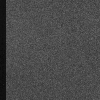

In [7]:
im = Image.open("nottingham/f005.gif")
im_array = np.asarray(im)

In [16]:
import os 
directory = "nottingham"
files = os.listdir(directory)
images = []
for filename in files:
    path2image = os.path.join(directory, filename)
    if os.path.isfile(path2image):
        image = Image.open(path2image)
        image_array = np.asarray(image)
        images.append(image_array)

In [17]:
min_x, min_y = 10000, 10000
for image in images:
    if image.shape[1] < min_x:
        min_x = image.shape[1]
    if image.shape[0] < min_y:
        min_y = image.shape[0]
print(min_x, min_y)
print(max_x, max_y)

358 437
549 387


In [18]:
for i, image in enumerate(images):
    im = Image.fromarray(image)
    if i == 0:
        im.show()
    im = im.resize((min_x, min_y))
    if i == 0:
        im.show()
    images[i] = np.asarray(im)
print(images[0].shape)

(437, 358)


In [77]:
from sklearn.preprocessing import StandardScaler
X = []
for image in images:
    image_vector = image.reshape((image.shape[0] * image.shape[1], ))
    X.append(image_vector)
stdsc = StandardScaler()
X = stdsc.fit_transform(X)
print(X.shape)

(100, 156446)


In [64]:
average_face = np.mean(images, axis=0)
im_average_face = Image.fromarray(average_face)

In [65]:
im_average_face.show()

In [59]:
U, sigma, VT = np.linalg.svd(X, full_matrices=False)
print(f"X: {X.shape}")
print(f"U: {U.shape}")
print(f"Sigma: {sigma.shape}")
print(f"VT: {VT.shape}")

X: (100, 156446)
U: (100, 100)
Sigma: (100,)
VT: (100, 156446)


In [60]:
s1 = sigma[np.where(sigma > 7.7 * 1e4)]
u1 = U[:, np.where(sigma > 7.7 * 1e4)]
vt1 = VT[:, np.where(sigma > 7.7 * 1e4)]
s1.shape

(2,)

In [111]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.90)
pca = pca.fit(X)
Xt = pca.transform(X)

In [119]:
from sklearn.cluster import KMeans 
km = KMeans(n_clusters=2)
km.fit(Xt)
labels = km.predict(Xt)

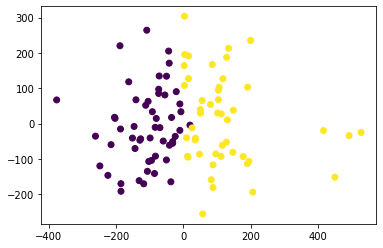

In [113]:
import matplotlib.pyplot as plt 

_ = plt.figure()
plt.scatter(Xt[:, 0], Xt[:, 1], c=labels)
plt.show()

In [114]:
cluster1 = np.where(labels == 0)
cluster0 = np.where(labels == 1)

In [115]:
for i in cluster0[0]:
    print(f"Cluster = 0, image file = {files[int(i)]}")

Cluster = 0, image file = f041.gif
Cluster = 0, image file = f055.gif
Cluster = 0, image file = f082.gif
Cluster = 0, image file = f054.gif
Cluster = 0, image file = f040.gif
Cluster = 0, image file = m049.gif
Cluster = 0, image file = f094.gif
Cluster = 0, image file = m072.gif
Cluster = 0, image file = f053.gif
Cluster = 0, image file = f046.gif
Cluster = 0, image file = f050.gif
Cluster = 0, image file = f092.gif
Cluster = 0, image file = f045.gif
Cluster = 0, image file = m003.gif
Cluster = 0, image file = f037.gif
Cluster = 0, image file = f023.gif
Cluster = 0, image file = m002.gif
Cluster = 0, image file = f021.gif
Cluster = 0, image file = f009.gif
Cluster = 0, image file = f020.gif
Cluster = 0, image file = f031.gif
Cluster = 0, image file = f019.gif
Cluster = 0, image file = f033.gif
Cluster = 0, image file = m013.gif
Cluster = 0, image file = m036.gif
Cluster = 0, image file = f017.gif
Cluster = 0, image file = m023.gif
Cluster = 0, image file = f014.gif
Cluster = 0, image f

In [116]:
for i in cluster1[0]:
    print(f"Cluster = 1, image file = {files[int(i)]}")

Cluster = 1, image file = m060.gif
Cluster = 1, image file = m074.gif
Cluster = 1, image file = m100.gif
Cluster = 1, image file = f068.gif
Cluster = 1, image file = m075.gif
Cluster = 1, image file = m077.gif
Cluster = 1, image file = m063.gif
Cluster = 1, image file = f042.gif
Cluster = 1, image file = f081.gif
Cluster = 1, image file = m076.gif
Cluster = 1, image file = m066.gif
Cluster = 1, image file = m099.gif
Cluster = 1, image file = f084.gif
Cluster = 1, image file = f085.gif
Cluster = 1, image file = m067.gif
Cluster = 1, image file = m073.gif
Cluster = 1, image file = m059.gif
Cluster = 1, image file = m065.gif
Cluster = 1, image file = f087.gif
Cluster = 1, image file = f093.gif
Cluster = 1, image file = f086.gif
Cluster = 1, image file = m070.gif
Cluster = 1, image file = m064.gif
Cluster = 1, image file = m017.gif
Cluster = 1, image file = f034.gif
Cluster = 1, image file = m004.gif
Cluster = 1, image file = f032.gif
Cluster = 1, image file = m008.gif
Cluster = 1, image f

In [118]:
km2 = KMeans(n_clusters=2)
km2.fit(X)
labels2 = km2.predict(X)

In [120]:
cluster12 = np.where(labels2 == 0)
cluster02 = np.where(labels2 == 1)
for i in cluster02[0]:
    print(f"Cluster = 0, image file = {files[int(i)]}")
for i in cluster12[0]:
    print(f"Cluster = 1, image file = {files[int(i)]}")

Cluster = 0, image file = m060.gif
Cluster = 0, image file = m074.gif
Cluster = 0, image file = m100.gif
Cluster = 0, image file = f068.gif
Cluster = 0, image file = m075.gif
Cluster = 0, image file = m077.gif
Cluster = 0, image file = m063.gif
Cluster = 0, image file = f042.gif
Cluster = 0, image file = f081.gif
Cluster = 0, image file = m076.gif
Cluster = 0, image file = m066.gif
Cluster = 0, image file = m099.gif
Cluster = 0, image file = f084.gif
Cluster = 0, image file = f085.gif
Cluster = 0, image file = m067.gif
Cluster = 0, image file = m073.gif
Cluster = 0, image file = m059.gif
Cluster = 0, image file = m065.gif
Cluster = 0, image file = f087.gif
Cluster = 0, image file = f093.gif
Cluster = 0, image file = f086.gif
Cluster = 0, image file = m070.gif
Cluster = 0, image file = m064.gif
Cluster = 0, image file = m017.gif
Cluster = 0, image file = f034.gif
Cluster = 0, image file = m004.gif
Cluster = 0, image file = f032.gif
Cluster = 0, image file = m008.gif
Cluster = 0, image f